In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from globalVariables import *
import simpleCNNwithInception as inceptionCNN
import simpleCNN as simpleCNN
import simpleCNNwithInceptionRegression as regressor
from keras.callbacks import CSVLogger
from scipy.ndimage import rotate

Questions
---------
- Does adding Redshift and Cluster Mass information help?
- Does adding everything help?

Conclusions
-----------
- 

In [3]:
train, test = get_tf_DataSet(augment_data=True, channels=['total','stellar'])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [4]:
dataset_to_numpy = list(train.as_numpy_iterator())
inputShape = dataset_to_numpy[0][0].shape[1:]

2023-02-03 09:31:42.259720: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [5]:
fiducial = simpleCNN.getModel(inputShape, train.num_classes, nAttributes=0)
epochs=40
au_history = fiducial.fit(
  x=train,
    validation_data=test,
  epochs=epochs
)

Epoch 1/40
120/120 [==============================] - 4s 33ms/step - loss: 1.2830 - accuracy: 0.3674 - val_loss: 1.1880 - val_accuracy: 0.4599
Epoch 2/40
120/120 [==============================] - 4s 32ms/step - loss: 1.1134 - accuracy: 0.4812 - val_loss: 1.2388 - val_accuracy: 0.4223
Epoch 3/40
120/120 [==============================] - 4s 33ms/step - loss: 1.0218 - accuracy: 0.5221 - val_loss: 1.1259 - val_accuracy: 0.4755
Epoch 4/40
120/120 [==============================] - 4s 33ms/step - loss: 0.9814 - accuracy: 0.5482 - val_loss: 0.9531 - val_accuracy: 0.5485
Epoch 5/40
120/120 [==============================] - 4s 33ms/step - loss: 0.9639 - accuracy: 0.5583 - val_loss: 0.9457 - val_accuracy: 0.5558
Epoch 6/40
120/120 [==============================] - 4s 33ms/step - loss: 0.9396 - accuracy: 0.5669 - val_loss: 0.9328 - val_accuracy: 0.5579
Epoch 7/40
120/120 [==============================] - 4s 33ms/step - loss: 0.9292 - accuracy: 0.5784 - val_loss: 0.9148 - val_accuracy: 0.5735

In [16]:
train, test = get_tf_DataSet(attributes=['redshift'], augment_data=True, channels=['total','stellar'])

dataset_to_numpy = list(train.as_numpy_iterator())
inputShape = dataset_to_numpy[0][0][0].shape[1:]
add_redshift = simpleCNN.getModel(inputShape, train.num_classes, nAttributes=1)
epochs=40
au_history = add_redshift.fit(
  x=train,
    validation_data=test,
  epochs=epochs
)

Epoch 1/40
120/120 [==============================] - 5s 36ms/step - loss: 1.2688 - accuracy: 0.3784 - val_loss: 1.2282 - val_accuracy: 0.4307
Epoch 2/40
120/120 [==============================] - 4s 35ms/step - loss: 1.1319 - accuracy: 0.4750 - val_loss: 1.1370 - val_accuracy: 0.4672
Epoch 3/40
120/120 [==============================] - 4s 35ms/step - loss: 1.0508 - accuracy: 0.5052 - val_loss: 1.0386 - val_accuracy: 0.5120
Epoch 4/40
120/120 [==============================] - 4s 34ms/step - loss: 1.0011 - accuracy: 0.5370 - val_loss: 1.0351 - val_accuracy: 0.5203
Epoch 5/40
120/120 [==============================] - 4s 34ms/step - loss: 0.9758 - accuracy: 0.5406 - val_loss: 0.9506 - val_accuracy: 0.5714
Epoch 6/40
120/120 [==============================] - 4s 34ms/step - loss: 0.9500 - accuracy: 0.5576 - val_loss: 0.9411 - val_accuracy: 0.5579
Epoch 7/40
120/120 [==============================] - 4s 35ms/step - loss: 0.9325 - accuracy: 0.5633 - val_loss: 0.9242 - val_accuracy: 0.5662

In [15]:
attributes = ['redshift','mass']
train, test = get_tf_DataSet(attributes=attributes, augment_data=True, channels=['total','stellar'])

dataset_to_numpy = list(train.as_numpy_iterator())
inputShape = dataset_to_numpy[0][0][0].shape[1:]
add_redshift_mass = simpleCNN.getModel(inputShape, train.num_classes, nAttributes=len(attributes))
epochs=40
au_history = add_redshift_mass.fit(
  x=train,
    validation_data=test,
  epochs=epochs
)

Epoch 1/40
120/120 [==============================] - 5s 36ms/step - loss: 1.2867 - accuracy: 0.3708 - val_loss: 1.1654 - val_accuracy: 0.4557
Epoch 2/40
120/120 [==============================] - 4s 35ms/step - loss: 1.1474 - accuracy: 0.4591 - val_loss: 1.0809 - val_accuracy: 0.4932
Epoch 3/40
120/120 [==============================] - 4s 35ms/step - loss: 1.0486 - accuracy: 0.5047 - val_loss: 1.0576 - val_accuracy: 0.5036
Epoch 4/40
120/120 [==============================] - 4s 36ms/step - loss: 1.0042 - accuracy: 0.5406 - val_loss: 0.9555 - val_accuracy: 0.5662
Epoch 5/40
120/120 [==============================] - 4s 35ms/step - loss: 0.9684 - accuracy: 0.5570 - val_loss: 0.9420 - val_accuracy: 0.5746
Epoch 6/40
120/120 [==============================] - 4s 37ms/step - loss: 0.9414 - accuracy: 0.5688 - val_loss: 0.9394 - val_accuracy: 0.5714
Epoch 7/40
120/120 [==============================] - 4s 35ms/step - loss: 0.9430 - accuracy: 0.5646 - val_loss: 0.9342 - val_accuracy: 0.5579

#### Everythihg possible

In [8]:
train, test = get_tf_DataSet( augment_data=True, channels=['total','stellar','xray'], 
                             correlations=[['total','stellar'],['total','xray'],['xray','stellar']],
                            attributes=['redshift','mass'])


100%|███████████████████████████████████████| 4800/4800 [11:31<00:00,  6.94it/s]


In [13]:
dataset_to_numpy = list(train.as_numpy_iterator())
inputShape = dataset_to_numpy[0][0][0].shape[1:]
add_all = simpleCNN.getModel(inputShape, train.num_classes, nAttributes=2)
epochs=40
au_history = add_all.fit(
  x=train,
    validation_data=test,
  epochs=epochs, initial_epoch=0,
)

Epoch 1/40
120/120 [==============================] - 5s 41ms/step - loss: 1.3065 - accuracy: 0.3620 - val_loss: 1.1865 - val_accuracy: 0.4265
Epoch 2/40
120/120 [==============================] - 5s 40ms/step - loss: 1.1470 - accuracy: 0.4549 - val_loss: 1.1155 - val_accuracy: 0.4546
Epoch 3/40
120/120 [==============================] - 5s 39ms/step - loss: 1.0780 - accuracy: 0.4951 - val_loss: 1.0315 - val_accuracy: 0.4922
Epoch 4/40
120/120 [==============================] - 5s 40ms/step - loss: 1.0217 - accuracy: 0.5268 - val_loss: 1.0276 - val_accuracy: 0.5109
Epoch 5/40
120/120 [==============================] - 5s 38ms/step - loss: 0.9853 - accuracy: 0.5437 - val_loss: 0.9621 - val_accuracy: 0.5600
Epoch 6/40
120/120 [==============================] - 5s 39ms/step - loss: 0.9465 - accuracy: 0.5651 - val_loss: 0.9690 - val_accuracy: 0.5589
Epoch 7/40
120/120 [==============================] - 5s 39ms/step - loss: 0.9424 - accuracy: 0.5612 - val_loss: 0.9357 - val_accuracy: 0.5652

#### Results

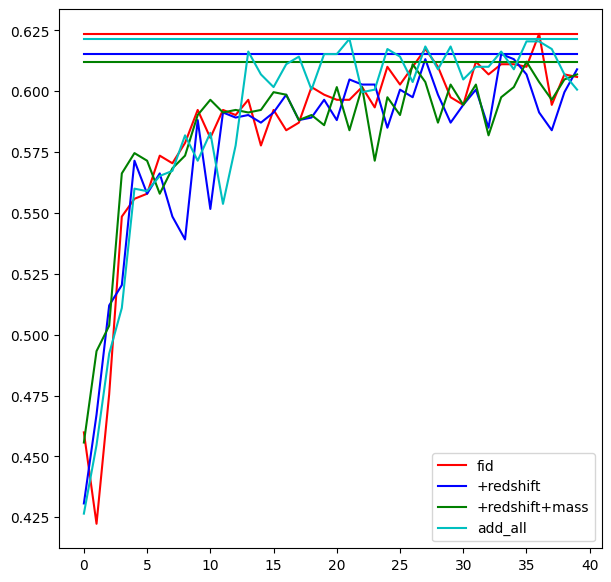

In [17]:
plt.figure(figsize=(7,7))

models = [ fiducial,  add_redshift, add_redshift_mass,add_all]
names = ['fid','+redshift','+redshift+mass','add_all']
c = ['r','b','g','c','y','k']
for i, iModel in enumerate(models):
    plt.plot(iModel.history.epoch, iModel.history.history['val_accuracy'], label=names[i], c=c[i])
    plt.plot(iModel.history.epoch, [np.max(iModel.history.history['val_accuracy'])]*len(iModel.history.epoch), c=c[i])

plt.legend()

### The old way that i did itattributes

In [ ]:
color=['r','g','b','c']

#Test the momentum on reliability

csv_file = 'pickles/addRedshift.csv'
model_file =  'pickles/addRedshift.h5'
    

previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
model = models.load_model(model_file)

trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Redshift', linestyle='--', color=color[0]) 
    
    

csv_file =  'pickles/globalAvPool.csv'
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1])
plt.plot(trainHistory['val_accuracy'], label = 'MaxPool', linestyle='--', color=color[1]) 

plt.legend()





In [ ]:
attributes = []
(train_images, train_att, train_labels), testSets = \
        getData(  indexFileRoot='pickles/testIndexesAttNone', testTrainSplit=0.15, attributes=attributes)
test_labels, test_images, test_att = None, None, None
for i in testSets.keys():
    iAtt = np.array([ testSets[i][j] for j in attributes]).T
    #iAtt =  testSets[i]['redshift']
    if test_labels is None:
        test_images = testSets[i]['images']
        test_labels = testSets[i]['labels']
        test_att = iAtt
    else:
        test_labels = np.vstack((test_labels, testSets[i]['labels']))
        test_images = np.vstack((test_images, testSets[i]['images']))
        test_att = np.vstack((test_att, iAtt))
        
nClasses = len(np.unique(train_labels))
inputShape = train_images.shape[1:]
nAttributes = 0 #train_att.shape[1]

color=['r','g','b','c']

#Test the momentum on reliability
print("LABELS ARE ",np.unique(test_labels))
csv_file = 'pickles/addAttributesNone.csv'
csv_logger = CSVLogger(csv_file, append=True)
model_file =  'pickles/addAttributesNone.h5'

if os.path.isfile( csv_file ):
    previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
    initial_epoch = previousEpochs.shape[0]
else:
    initial_epoch = 0
        
if os.path.isfile(model_file):
    print("FOUND PREVIOUS MODEL, LOADING...")
    model = models.load_model(model_file)
else:
    model = simpleCNN.getModel( inputShape, nClasses, nAttributes=nAttributes, \
                               momentum=0.9, finalLayer=256)
    
history = model.fit(train_images, train_labels, epochs=15, 
                    initial_epoch=initial_epoch,
                    validation_data=(test_images, test_labels),
                       callbacks=csv_logger)
    
model.save(model_file)
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='Accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Fiducial Validation', linestyle='--', color=color[0]) 
    
    
plt.legend()


In [ ]:
trainingSet, testSet = \
        getData(testTrainSplit=0.15,  \
                indexFileRoot='pickles/testIndexes', \
                    nChannels=1)
                   
#augmentedTrain = augmentData( trainingSet )   
nClasses = len(np.unique(trainingSet['label']))
inputShape = trainingSet['images'].shape[1:]
color=['r','g','b','c']


In [ ]:
trainingSet.keys()

In [ ]:
inputShape = trainingSet['images'].shape[1:]

In [ ]:
inputShape

In [ ]:
plt.hist(augmentedTrain['label'])

In [ ]:
attributes = []
nAttributes = len(attributes) #train_att.shape[1]

csv_file = 'pickles/addAttributesNoneSGD_aug.csv'
csv_logger = CSVLogger(csv_file, append=True)
model_file =  'pickles/addAttributesNoneSGD_aug.h5'

if os.path.isfile( csv_file ):
    previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
    initial_epoch = previousEpochs.shape[0]
else:
    initial_epoch = 0
        
if os.path.isfile(model_file):
    print("FOUND PREVIOUS MODEL, LOADING...")
    model = models.load_model(model_file)
else:
    model = simpleCNN.getModel( inputShape, nClasses, nAttributes=nAttributes, \
                               momentum=0.9, finalLayer=256, learning_rate=1e-4)
model.summary()  


inputLayerAtts = np.array([  augmentedTrain[iKey] for iKey in attributes ]).T
testLayerAtts = np.array([ testSet[iKey] for iKey in attributes ])

history = model.fit( augmentedTrain['images'], augmentedTrain['label'], epochs=40, 
                    initial_epoch=initial_epoch,
                    validation_data=(testSet['images'], testSet['label']),
                       callbacks=csv_logger)
    
    
model.save(model_file)


color=['r','g','b','c']

trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Redshift attribute with Max Pool', linestyle='--', color=color[0]) 
    
    

csv_file = 'pickles/addAttributesNoneSGD.csv'
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1])
plt.plot(trainHistory['val_accuracy'], label = 'Fiducial', linestyle='--', color=color[1]) 

plt.legend()


In [ ]:
attributes = ['mass']
nAttributes = len(attribute) #train_att.shape[1]


#Test the momentum on reliability
print("LABELS ARE ",np.unique(test_labels))

attributes = []
nAttributes = len(attributes)


csv_file = 'pickles/addAttributesMassSGD.csv'
csv_logger = CSVLogger(csv_file, append=True)
model_file =  'pickles/addAttributesMassSGD.h5'

if os.path.isfile( csv_file ):
    previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
    initial_epoch = previousEpochs.shape[0]
else:
    initial_epoch = 0
        
if os.path.isfile(model_file):
    print("FOUND PREVIOUS MODEL, LOADING...")
    model = models.load_model(model_file)
else:
    model = simpleCNN.getModel( inputShape, nClasses, nAttributes=nAttributes, \
                               momentum=0.9, finalLayer=256, learning_rate=1e-4)
model.summary()  


inputLayerAtts = np.array([  augmentedTrain[iKey] for iKey in attributes ]).T
testLayerAtts = np.array([ testSet[iKey] for iKey in attributes ])

history = model.fit( [augmentedTrain['images'], inputLayerAtts], augmentedTrain['label'], epochs=40, 
                    initial_epoch=initial_epoch,
                    validation_data=([testSet['images'], testLayerAtts], testSet['label']),
                       callbacks=csv_logger)
    
    
model.save(model_file)


color=['r','g','b','c']

trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Redshift attribute with Max Pool', linestyle='--', color=color[0]) 
    
    

csv_file = 'pickles/addAttributesNoneSGD.csv'
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1])
plt.plot(trainHistory['val_accuracy'], label = 'Fiducial', linestyle='--', color=color[1]) 

plt.legend()


In [ ]:
attributes = ['mass','redshift']
nAttributes = len(attribute) #train_att.shape[1]


#Test the momentum on reliability
print("LABELS ARE ",np.unique(test_labels))

attributes = []
nAttributes = len(attributes)


csv_file = 'pickles/addAttributesMassRedshiftSGD.csv'
csv_logger = CSVLogger(csv_file, append=True)
model_file =  'pickles/addAttributesMassRedshiftSGD.h5'

if os.path.isfile( csv_file ):
    previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
    initial_epoch = previousEpochs.shape[0]
else:
    initial_epoch = 0
        
if os.path.isfile(model_file):
    print("FOUND PREVIOUS MODEL, LOADING...")
    model = models.load_model(model_file)
else:
    model = simpleCNN.getModel( inputShape, nClasses, nAttributes=nAttributes, \
                               momentum=0.9, finalLayer=256, learning_rate=1e-4)
model.summary()  


inputLayerAtts = np.array([  augmentedTrain[iKey] for iKey in attributes ]).T
testLayerAtts = np.array([ testSet[iKey] for iKey in attributes ])

history = model.fit( [augmentedTrain['images'], inputLayerAtts], augmentedTrain['label'], epochs=40, 
                    initial_epoch=initial_epoch,
                    validation_data=([testSet['images'], testLayerAtts], testSet['label']),
                       callbacks=csv_logger)
    
    
model.save(model_file)


color=['r','g','b','c']

trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Redshift attribute with Max Pool', linestyle='--', color=color[0]) 
    
    

csv_file = 'pickles/addAttributesNoneSGD.csv'
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1])
plt.plot(trainHistory['val_accuracy'], label = 'Fiducial', linestyle='--', color=color[1]) 

plt.legend()


In [ ]:
plt.imshow(tf.math.confusion_matrix(prediction,test_labels ))

In [ ]:
attributes = ['redshift']
nAttributes = len(attributes)


csv_file = 'pickles/addAttributesZ_SGD_maxPool_aug.csv'
csv_logger = CSVLogger(csv_file, append=True)
model_file =  'pickles/addAttributesZ_SGD_maxPool_aug.h5'

if os.path.isfile( csv_file ):
    previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
    initial_epoch = previousEpochs.shape[0]
else:
    initial_epoch = 0
        
if os.path.isfile(model_file):
    print("FOUND PREVIOUS MODEL, LOADING...")
    model = models.load_model(model_file)
else:
    model = simpleCNN.getModel( inputShape, nClasses, nAttributes=nAttributes, \
                               momentum=0.9, finalLayer=256, learning_rate=1e-4)
model.summary()  


inputLayerAtts = np.array([  augmentedTrain[iKey] for iKey in attributes ]).T
testLayerAtts = np.array([ testSet[iKey] for iKey in attributes ]).T

history = model.fit( [augmentedTrain['images'], inputLayerAtts], augmentedTrain['label'], epochs=40, 
                    initial_epoch=initial_epoch,
                    validation_data=([testSet['images'], testLayerAtts], testSet['label']),
                       callbacks=csv_logger)
    
    
model.save(model_file)


color=['r','g','b','c']

trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Redshift attribute with Max Pool', linestyle='--', color=color[0]) 
    
    

csv_file = 'pickles/addAttributesNoneSGD.csv'
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1])
plt.plot(trainHistory['val_accuracy'], label = 'Fiducial', linestyle='--', color=color[1]) 

plt.legend()


In [ ]:
attributes = ['redshift']
(train_images, train_att, train_labels), testSets = \
        getData(  indexFileRoot='pickles/testIndexes', \
                testTrainSplit=0.15, attributes=attributes)
test_labels, test_images, test_att = None, None, None
for i in testSets.keys():
    iAtt = np.array([ testSets[i][j] for j in attributes]).T
    #iAtt =  testSets[i]['redshift']
    if test_labels is None:
        test_images = testSets[i]['images']
        test_labels = testSets[i]['labels']
        test_att = iAtt
    else:
        test_labels = np.vstack((test_labels, testSets[i]['labels']))
        test_images = np.vstack((test_images, testSets[i]['images']))
        test_att = np.vstack((test_att, iAtt))
        
nClasses = len(np.unique(train_labels))
inputShape = train_images.shape[1:]
nAttributes = train_att.shape[1]

color=['r','g','b','c']

#Test the momentum on reliability
print("LABELS ARE ",np.unique(test_labels))
csv_file = 'pickles/addAttributesZ_SGD_maxPool_2.csv'
csv_logger = CSVLogger(csv_file, append=True)
model_file =  'pickles/addAttributesZ_SGD_maxPool_2.h5'

if os.path.isfile( csv_file ):
    previousEpochs = np.loadtxt( csv_file, delimiter=',',skiprows=1 )
    initial_epoch = previousEpochs.shape[0]
else:
    initial_epoch = 0
        
if os.path.isfile(model_file):
    print("FOUND PREVIOUS MODEL, LOADING...")
    model = models.load_model(model_file)
else:
    model = simpleCNN.getModel( inputShape, nClasses, nAttributes=nAttributes, \
                               momentum=0.9, finalLayer=256, learning_rate=1e-4)
model.summary()  
history = model.fit([train_images, train_att], train_labels, epochs=40, 
                    initial_epoch=initial_epoch,
                    validation_data=([test_images, test_att], test_labels),
                       callbacks=csv_logger)
    
model.save(model_file)
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[0])
plt.plot(trainHistory['val_accuracy'], label = 'Redshift attribute with Max Pool', linestyle='--', color=color[0]) 
    
    

csv_file = 'pickles/addAttributesNoneSGD.csv'
trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1])
plt.plot(trainHistory['val_accuracy'], label = 'Fiducial', linestyle='--', color=color[1]) 

plt.legend()


In [ ]:
model.layers[12].pool_size

In [ ]:
all_csv_files = ['pickles/addAttributesNoneSGD.csv', \
            'pickles/addAttributesZ_SGD.csv',\
            'pickles/addAttributesMassSGD.csv',\
            'pickles/addAttributesMassRedshift.csv',\
            'pickles/addAttributesZ_SGD_maxPool.csv',
                'pickles/addAttributesZ_SGD_maxPool_4.csv']
colors = ['r','b','g','c','k','yellow']
for i, csv_file in enumerate(all_csv_files):
    
    trainHistory = np.loadtxt( csv_file, delimiter=',', 
                    dtype=[('epoch', object), ('accuracy', float), 
                    ('loss', float), ('val_accuracy',float),('val_loss', float)], skiprows=1)
     
    #plt.plot(trainHistory['accuracy'], label='accuracy', color=color[1],
    #        colo)
    plt.plot(trainHistory['val_accuracy'], label = csv_file.split('/')[1], \
             linestyle='--', color=colors[i]) 

plt.legend()


In [ ]:
model_file =  models.load_model('pickles/addAttributesZ_SGD_maxPool.h5')
new_model_file =  models.load_model('pickles/addAttributesZ_SGD_maxPool_2.h5')

In [ ]:
model_file.summary()
new_model_file.summary()